In [82]:
import os
import cv2
import keras 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.optimizers import Adam
import pickle
import numpy as np

In [83]:
x_train = pickle.load(open("x_train.pickle", "rb"))
y_train = pickle.load(open("y_train.pickle", "rb"))

In [84]:
x_train = x_train/255.0
x_train.shape

(11990, 32, 32, 3)

In [85]:
y_train.shape

(11990, 4)

# LeNet-5 Architecture

In [86]:
def LeNet_Model():
    model = Sequential()
    #Layer 1
    #Conv Layer 1
    model.add(Conv2D(filters = 6, 
                 kernel_size = 5, 
                 strides = 1, 
                 activation = 'relu', 
                 input_shape = (32,32,3)))
    #Pooling layer 1
    model.add(MaxPooling2D(pool_size = 2, strides = 2))
    #Layer 2
    #Conv Layer 2
    model.add(Conv2D(filters = 16, 
                 kernel_size = 5,
                 strides = 1,
                 activation = 'relu',
                 input_shape = (14,14,6)))
    #Pooling Layer 2
    model.add(MaxPooling2D(pool_size = 2, strides = 2))
    #Flatten
    model.add(Flatten())
    #Layer 3
    #Fully connected layer 1
    model.add(Dense(units = 120, activation = 'relu'))
    #Layer 4
    #Fully connected layer 2
    model.add(Dense(units = 84, activation = 'relu'))
    #Layer 5
    #Output Layer
    model.add(Dense(units = 4, activation = 'softmax'))
    return model

In [87]:
LeNet = LeNet_Model()
#Adam = Adam (lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0, amsgrad=False)
LeNet.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [88]:
history = LeNet.fit(x_train, y_train, batch_size=32, epochs=8, 
                 validation_split=0.2)

Train on 9592 samples, validate on 2398 samples
Epoch 1/8
9592/9592 [==============================] - 4s 460us/step - loss: 0.6858 - acc: 0.7152 - val_loss: 0.2646 - val_acc: 0.8957
Epoch 2/8
9592/9592 [==============================] - 6s 581us/step - loss: 0.1308 - acc: 0.9582 - val_loss: 0.0627 - val_acc: 0.9812
Epoch 3/8
9592/9592 [==============================] - 8s 857us/step - loss: 0.0498 - acc: 0.9848 - val_loss: 0.0307 - val_acc: 0.9908
Epoch 4/8
9592/9592 [==============================] - 8s 877us/step - loss: 0.0302 - acc: 0.9911 - val_loss: 0.0201 - val_acc: 0.9950
Epoch 5/8
9592/9592 [==============================] - 8s 812us/step - loss: 0.0144 - acc: 0.9954 - val_loss: 0.0121 - val_acc: 0.9967
Epoch 6/8
9592/9592 [==============================] - 5s 550us/step - loss: 0.0088 - acc: 0.9973 - val_loss: 0.0051 - val_acc: 0.9987
Epoch 7/8
9592/9592 [==============================] - 4s 421us/step - loss: 0.0045 - acc: 0.9989 - val_loss: 0.0037 - val_acc: 0.9992
Epoch 8

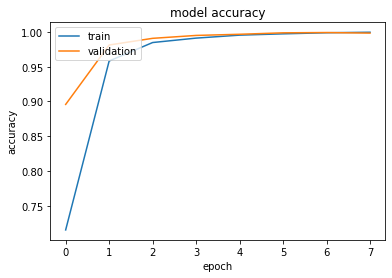

In [89]:
# Plotting Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

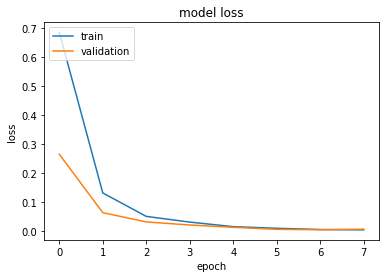

In [90]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Model Evaluation

In [91]:
DataDir_Test = "E:/asl_alphabet_test"

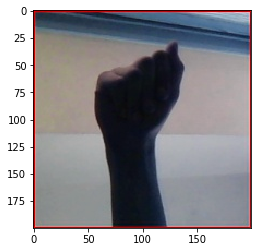

In [92]:
Categories = ["A", "B", "C", "D"]
for category in Categories:
    path = os.path.join(DataDir_Test, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(img_array)
        break
    break

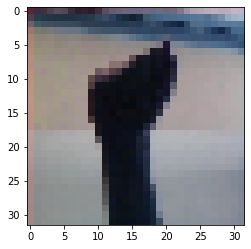

In [93]:
img_size = 32
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array)
plt.show()

In [94]:
test_data = []
def create_test_data():
    for category in Categories:
        path = os.path.join(DataDir_Test, category)
        class_num = Categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img))
            new_array = cv2.resize(img_array, (img_size, img_size))
            test_data.append([new_array, class_num])
create_test_data()

In [95]:
x_test = []
y_test = []

for features, labels in test_data:
    x_test.append(features)
    y_test.append(labels)

In [96]:
x_test = np.asarray(x_test)
x_test = np.array(x_test).reshape(x_test.shape[0], img_size, img_size, 3)
print(x_test.shape)
y_test = np.array(y_test).reshape(-1, 1)
from keras.utils import np_utils

# One-hot encode the training labels
y_test = np_utils.to_categorical(y_test)
print(y_test.shape)

(1173, 32, 32, 3)
(1173, 4)


In [97]:
x_test = x_test/255.0

In [99]:
preds = LeNet.evaluate(x_test, y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1173/1173 [==============================] - 0s 160us/step
Loss = 0.007002442667019301
Test Accuracy = 0.9974424552429667
